In [1]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/handwriting /csv/handwriting train data.csv')

In [4]:
df.head()

,Image,Label
0,0.png,things
1,1.png,hurry
2,2.png,one
3,3.png,feet
4,4.png,5


In [5]:
dir = '/content/drive/My Drive/Colab Notebooks/data/handwriting /extracted_words'

In [6]:
img_size_w = 50
img_size_h = 20

img_list = []

for img in os.listdir(dir):
  img_array = cv2.imread(os.path.join(dir,img), cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (img_size_w,img_size_h))
  img_list.append((img,new_array))

In [7]:
# print(img_list[0])

In [8]:
def get_array(name):
  for image,array in img_list:
    if name == image:
      return array

In [9]:
df['Array'] = df['Image'].apply(get_array)

In [10]:
df.head()

,Image,Label,Array
0,0.png,things,"[[191, 187, 85, 131, 195, 189, 191, 79, 160, 1..."
1,1.png,hurry,"[[181, 155, 96, 192, 186, 186, 184, 185, 181, ..."
2,2.png,one,"[[183, 180, 180, 180, 183, 191, 190, 192, 195,..."
3,3.png,feet,"[[190, 193, 172, 127, 131, 140, 140, 155, 182,..."
4,4.png,5,"[[155, 158, 162, 167, 173, 181, 187, 194, 196,..."


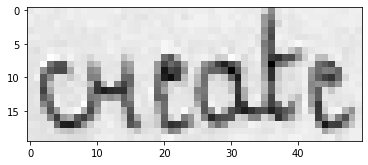

In [11]:
plt.imshow(img_list[0][1], cmap='gray')

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
df['Label_Class'] = df['Label']

In [14]:
label_encoder = LabelEncoder()
df['Label_Class'] = label_encoder.fit_transform(df['Label_Class'])


In [15]:
print('total classes', label_encoder.classes_)
print('total length of classes', len(label_encoder.classes_))
output_Classes = len(label_encoder.classes_)

total classes ['1' '2' '3' '4' '5' '6' '7' '8' 'It' 'a' 'about' 'activities' 'addiction'
 'allows' 'amounts' 'and' 'anxiety' 'aspects' 'at' 'attempting' 'be'
 'behavioral' 'break' 'can' 'chat' 'compete' 'computer' 'connection'
 'constant' 'create' 'curves' 'day' 'depression' 'develop' 'discharge'
 'do' 'done' 'drug' 'efforts' 'enjoy' 'events' 'extent' 'fantasy' 'feet'
 'for' 'for ' 'friends' 'guilt' 'has' 'horizontal' 'human' 'hurry' 'if'
 'internet' 'know' 'like' 'long' 'makes' 'may' 'meet' 'mood' 'no' 'not'
 'of' 'on' 'one' 'opening' 'or' 'other' 'others' 'our' 'out' 'people'
 'per' 'personal' 'plan' 'plotting' 'points' 'poor' 'positive' 'real'
 'remember' 'results' 'short' 'similar' 'social' 'sollowing' 'some'
 'speed' 'spinning' 'start' 'stress' 'study' 'substitution' 'suffer'
 'suffering' 'tasks' 'tend' 'than' 'that' 'the' 'there' 'things'
 'thoughts' 'times' 'to' 'top' 'type' 'upon' 'us' 'users' 'very' 'virtual'
 'wait' 'week' 'which' 'who' 'winging' 'with' 'words' 'world' 'your'

In [16]:
Label_classes = label_encoder.classes_
print(Label_classes)

['1' '2' '3' '4' '5' '6' '7' '8' 'It' 'a' 'about' 'activities' 'addiction'
 'allows' 'amounts' 'and' 'anxiety' 'aspects' 'at' 'attempting' 'be'
 'behavioral' 'break' 'can' 'chat' 'compete' 'computer' 'connection'
 'constant' 'create' 'curves' 'day' 'depression' 'develop' 'discharge'
 'do' 'done' 'drug' 'efforts' 'enjoy' 'events' 'extent' 'fantasy' 'feet'
 'for' 'for ' 'friends' 'guilt' 'has' 'horizontal' 'human' 'hurry' 'if'
 'internet' 'know' 'like' 'long' 'makes' 'may' 'meet' 'mood' 'no' 'not'
 'of' 'on' 'one' 'opening' 'or' 'other' 'others' 'our' 'out' 'people'
 'per' 'personal' 'plan' 'plotting' 'points' 'poor' 'positive' 'real'
 'remember' 'results' 'short' 'similar' 'social' 'sollowing' 'some'
 'speed' 'spinning' 'start' 'stress' 'study' 'substitution' 'suffer'
 'suffering' 'tasks' 'tend' 'than' 'that' 'the' 'there' 'things'
 'thoughts' 'times' 'to' 'top' 'type' 'upon' 'us' 'users' 'very' 'virtual'
 'wait' 'week' 'which' 'who' 'winging' 'with' 'words' 'world' 'your'
 'youtube']


In [17]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/data/handwriting /label_classes', 'wb') as f:
  pickle.dump(Label_classes, f)

In [18]:
df.head()

,Image,Label,Array,Label_Class
0,0.png,things,"[[191, 187, 85, 131, 195, 189, 191, 79, 160, 1...",102
1,1.png,hurry,"[[181, 155, 96, 192, 186, 186, 184, 185, 181, ...",51
2,2.png,one,"[[183, 180, 180, 180, 183, 191, 190, 192, 195,...",65
3,3.png,feet,"[[190, 193, 172, 127, 131, 140, 140, 155, 182,...",43
4,4.png,5,"[[155, 158, 162, 167, 173, 181, 187, 194, 196,...",4


In [19]:
onehot = OneHotEncoder()
labels = onehot.fit_transform(df.Label_Class.values.reshape(-1,1)).toarray()

In [20]:
print(labels[4])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [21]:
training_set = df['Array']
train_set = []
for img in training_set:
  img = img.reshape(img_size_w, img_size_h, 1)
  train_set.append(img)
train_set = np.array(train_set)

In [22]:
train_set.shape

(163, 50, 20, 1)

In [23]:
train_labels = df.Label_Class.values

In [24]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [25]:
i = Input(shape=(img_size_w,img_size_h,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(output_Classes, activation='softmax')(x)

In [26]:
model = Model(i,x)

In [27]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
r = model.fit(train_set,labels, epochs=500,batch_size=42, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 3s 416ms/step - loss: 7.4661 - accuracy: 0.0000e+00 - val_loss: 9.2175 - val_accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 1s 216ms/step - loss: 5.4955 - accuracy: 0.0305 - val_loss: 11.6637 - val_accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 1s 197ms/step - loss: 5.3693 - accuracy: 0.0234 - val_loss: 14.4438 - val_accuracy: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 1s 215ms/step - loss: 5.0547 - accuracy: 0.0573 - val_loss: 15.8594 - val_accuracy: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 1s 216ms/step - loss: 4.6248 - accuracy: 0.0919 - val_loss: 16.8776 - val_accuracy: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 1s 218ms/step - loss: 4.5465 - accuracy: 0.0580 - val_loss: 19.4441 - val_accuracy: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 1s 223ms/step - loss: 4.4982 - accuracy: 0.0328 - val_loss: 23.2463 - 

In [29]:
model.save('handwrite_model.h5')

In [30]:
img = '/content/drive/My Drive/Colab Notebooks/data/handwriting /extracted_words/41.png'

In [31]:
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)
pred = model.predict(array)
y = np.argmax(pred)

In [35]:
print(y)
label_encoder.classes_[y]

76


'plotting'